In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:


def rewrite_geant4_csv_header(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    # Extract column names from metadata
    column_names = []
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.startswith("#column"):
            match = re.match(r"#column\s+\w+\s+(\w+)", line)
            if match:
                column_names.append(match.group(1))
        elif not line.startswith("#"):
            data_start_index = i
            break

    # Write new file with standard header
    with open(output_path, 'w') as outfile:
        outfile.write(",".join(column_names) + "\n")  # new header
        for line in lines[data_start_index:]:
            outfile.write(line)

def Getinfo(f1,f2):
    if(f1!=""):
        rewrite_geant4_csv_header(f1,f2)
    return pd.read_csv(f2)

    


In [13]:
Folder="build"
particle="electron_3GeV"
isConvert=True
if(isConvert):
    G4Result=Getinfo(f"../{Folder}/out_nt_Geant4Hits_t0.csv", f"Test_Geant4Hits_clean_{particle}.csv")
    OptResult=Getinfo(f"../{Folder}/out_nt_OpticksHits_t0.csv", f"Test_OpticksHits_clean_{particle}.csv")
    PhotonInfo=Getinfo(f"../{Folder}/out_nt_PhotonInfo_t0.csv", f"Test_PhotonInfo_clean_{particle}.csv")
else:
    G4Result=Getinfo("", f"Test_Geant4Hits_clean_{particle}.csv")
    OptResult=Getinfo("", f"Test_OpticksHits_clean_{particle}.csv")
    PhotonInfo=Getinfo("", f"Test_PhotonInfo_clean_{particle}.csv")



In [14]:
print(len(OptResult['z']))
print(len(G4Result['z']))


2526258
2549696


In [15]:
#G4
#evtID,SensorID,SensorName,x,y,z,t,wavelength,ProcessID

#Opticks
#evtID,hit_Id,SensorID,x,y,z,t,wavelength

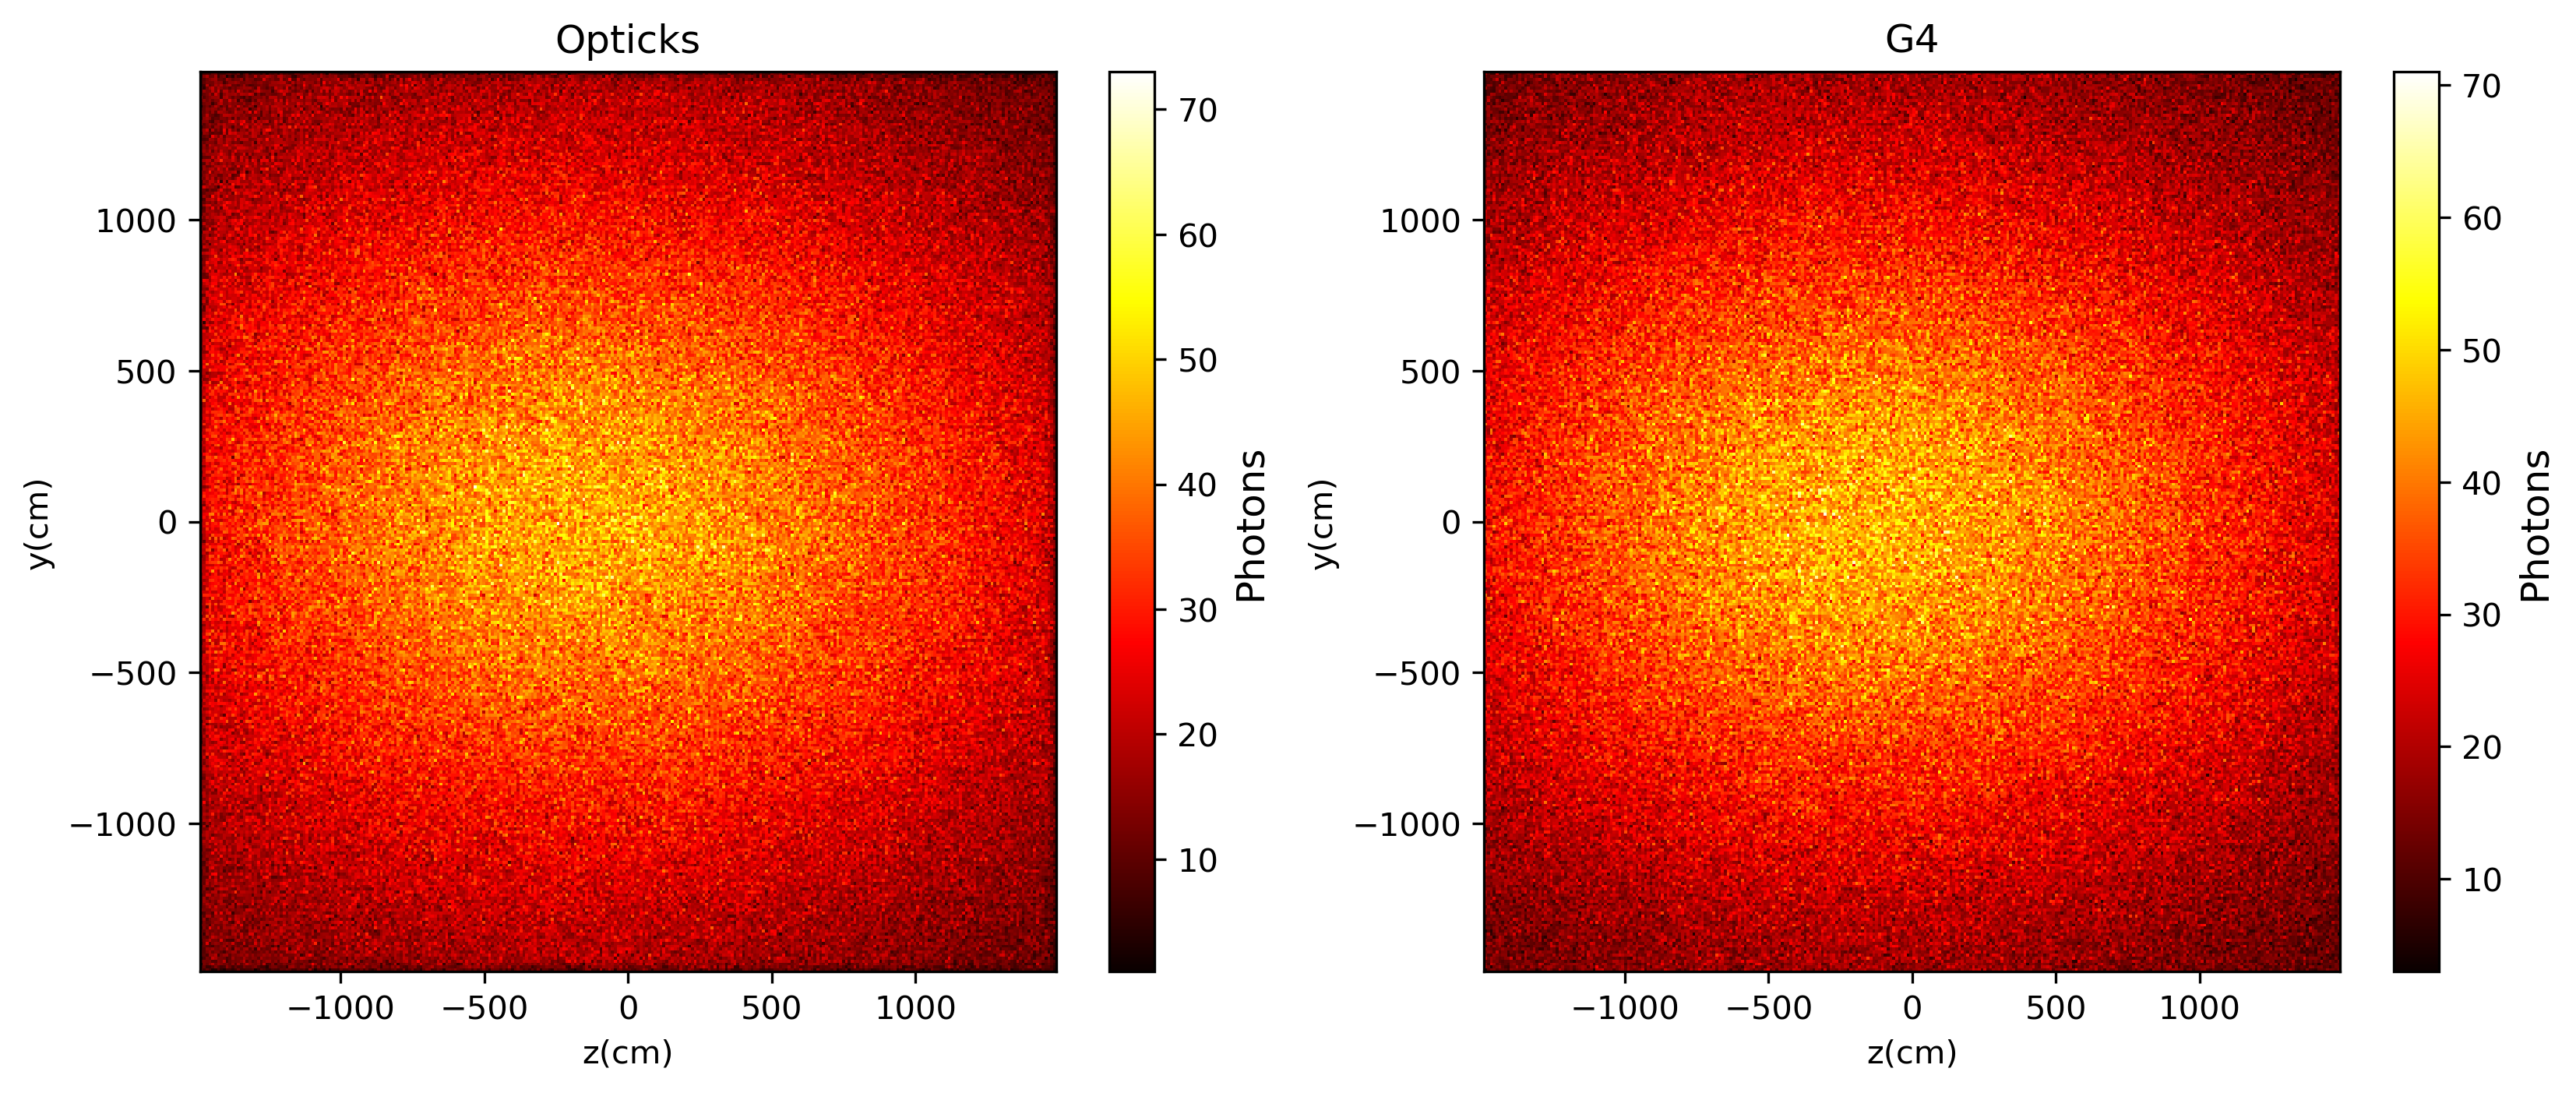

In [22]:
c=500
b=300
fig,p=plt.subplots(1,2,dpi=300,figsize=(13,5))
p[0].set_title("Opticks")
h1=p[0].hist2d(OptResult['z'],OptResult['y'],bins=b,cmin=0,cmax=c,cmap="hot",label="Opticks")
cbar1=fig.colorbar(h1[3])
cbar1.set_label("Photons", fontsize=12)
p[1].set_title("G4")
h2=p[1].hist2d(G4Result['z'],G4Result['y'],bins=b,cmin=0,cmax=c,cmap="hot",label="Geant4")
cbar2=fig.colorbar(h2[3])
cbar2.set_label("Photons", fontsize=12)
for i in range(0,2):
    p[i].set_xlabel("z(cm)")
    p[i].set_ylabel("y(cm)")


In [17]:
np.mean(G4Result['t'])

410.7744717845185

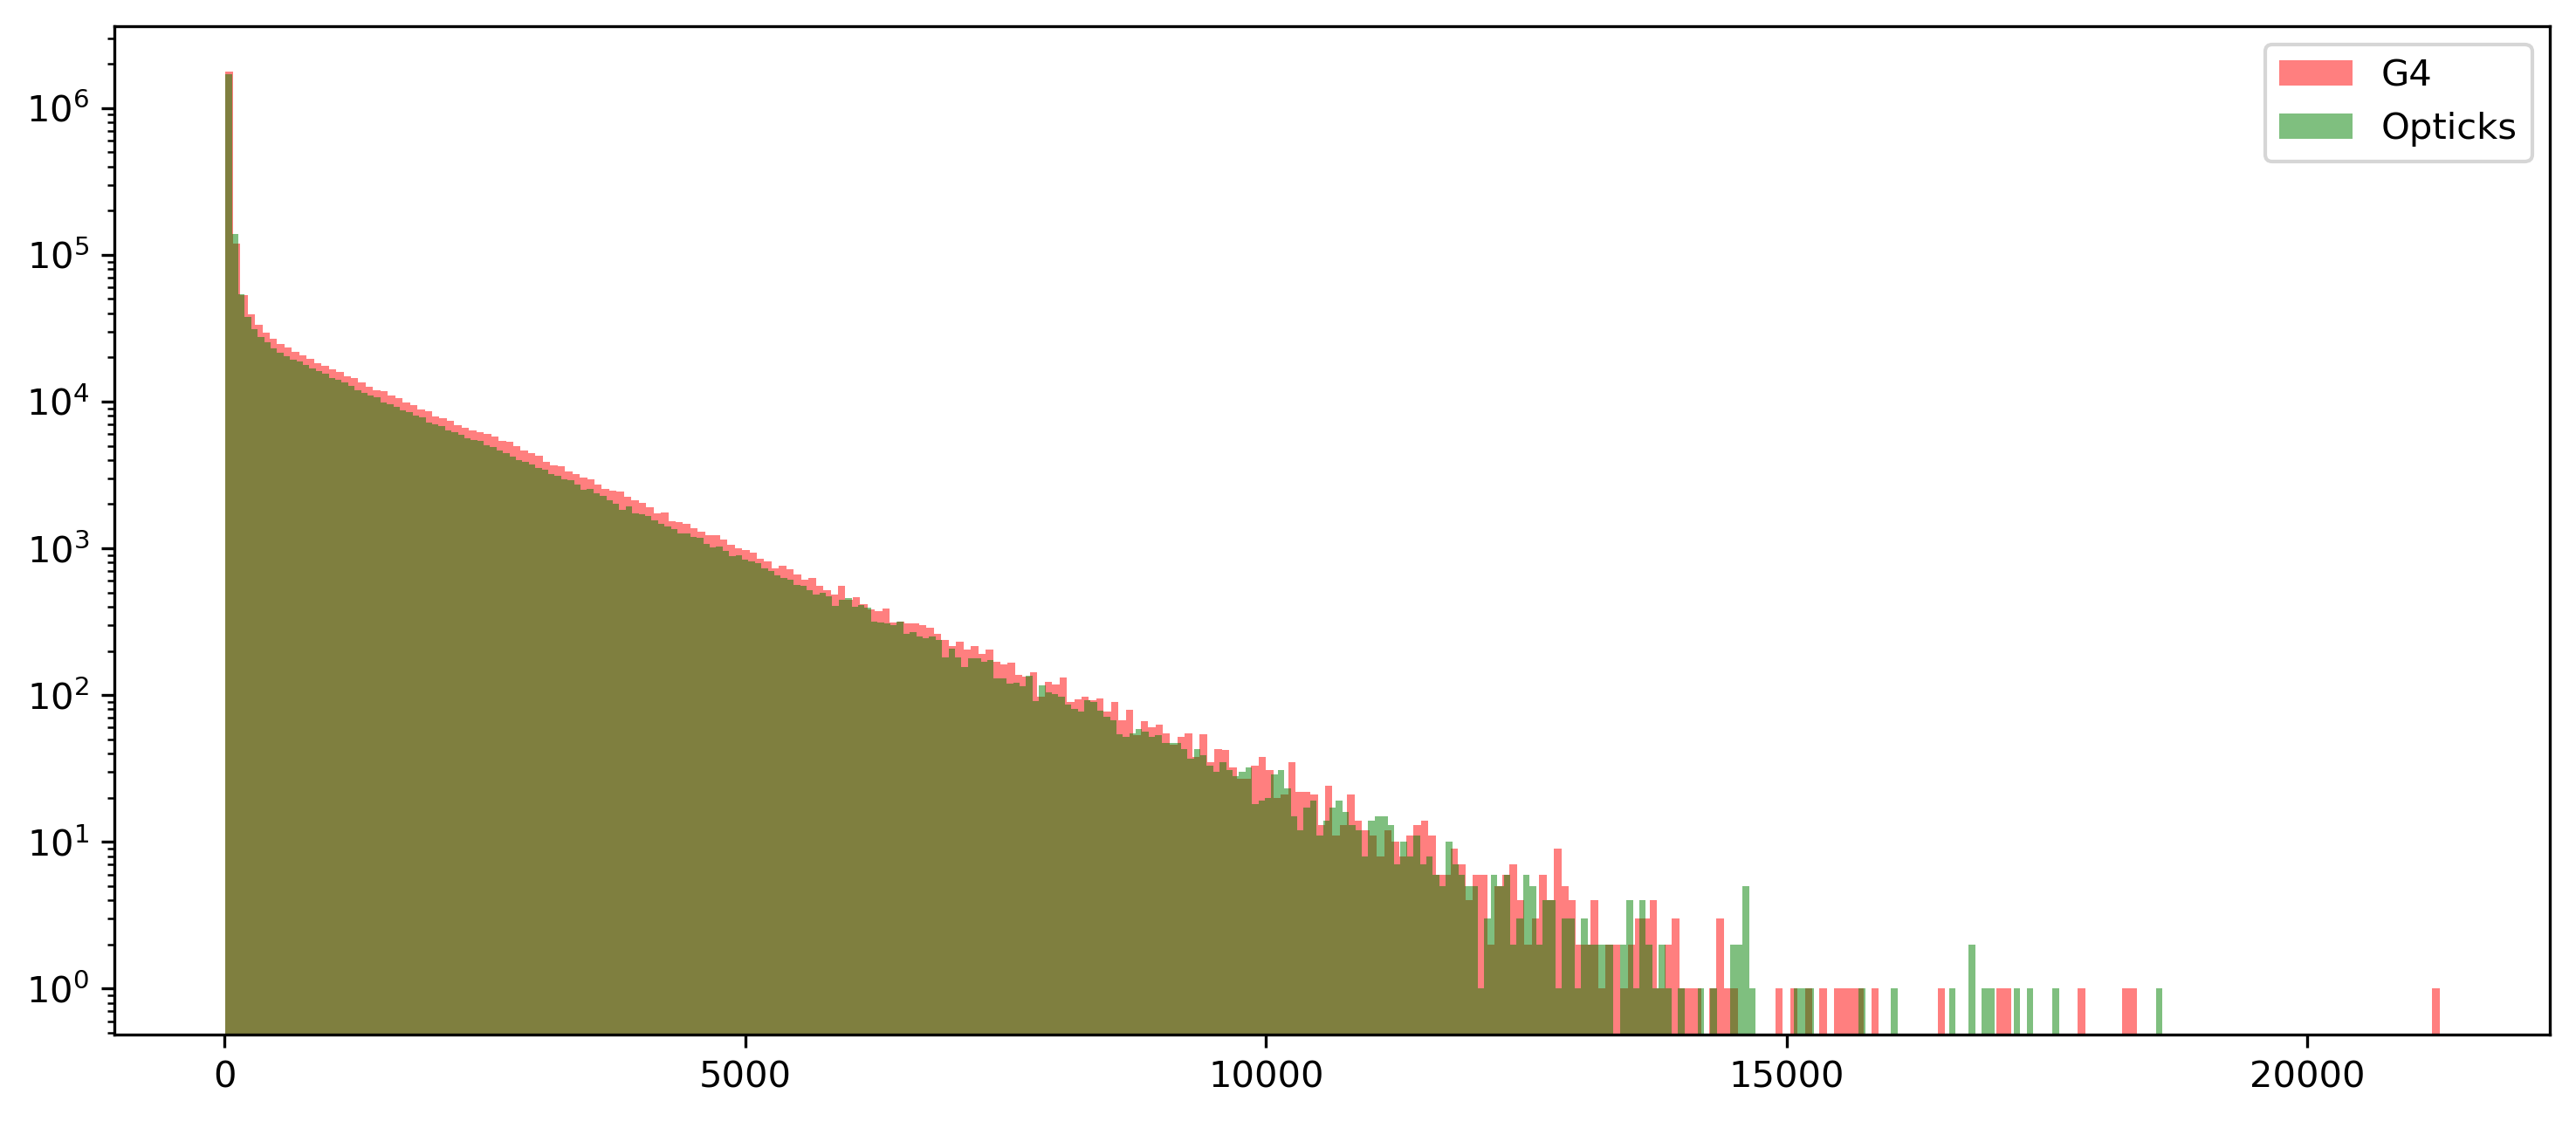

In [23]:
b=300
plt.figure(dpi=300,figsize=(12,5))
plt.hist(G4Result['t'],bins=b,label="G4",color="red",alpha=0.5)
plt.hist(OptResult['t'],bins=b,label="Opticks",color="green",alpha=0.5)
plt.semilogy()
plt.legend()

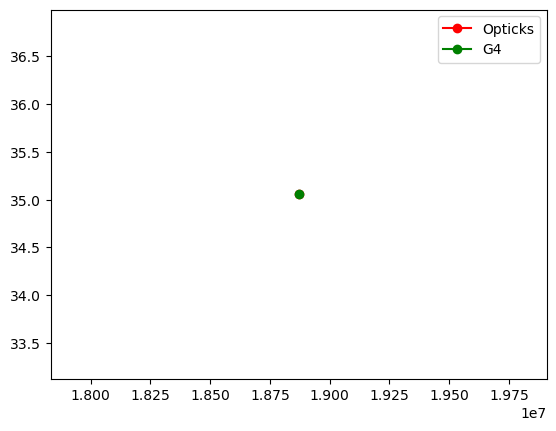

In [19]:
plt.plot(PhotonInfo["OScintPhotons"],PhotonInfo["Time"],color="red",linestyle='-',marker='o',label="Opticks")
plt.plot(PhotonInfo["G4ScintPhotons"],PhotonInfo["Time"],color="green",linestyle='-',marker='o',label="G4")
plt.legend()
plt.show()

In [20]:
print(PhotonInfo)

   G4ScintPhotons  G4CernPhotons  OScintPhotons  OCerenkovPhotons     Time  \
0        18870316              0       18870316                 0  35.0543   

   eventID  
0        0  


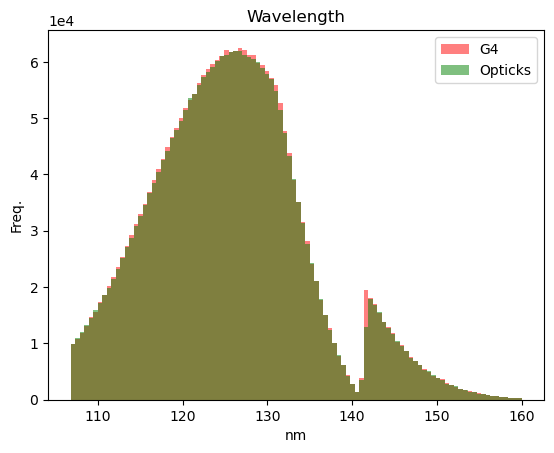

In [21]:

plt.title("Wavelength")
plt.hist(G4Result['wavelength'],bins=100,label="G4",color="red",alpha=0.5)
plt.hist(OptResult['wavelength'],bins=100,label="Opticks",color="green",alpha=0.5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("nm")
plt.ylabel("Freq.")
plt.legend()